Saving FinalCountryDataset.csv to FinalCountryDataset (62).csv
Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
           0         1         2         3         4   ...   53   54   55   56   57
0    0.038183  0.025207  0.002091  0.001122  0.472426  ...  0.0  0.0  0.0  0.0  0.0
1    0.001681  0.002078  0.004112  0.000638  0.564338  ...  0.0  0.0  0.0  0.0  0.0
2    0.139297  0.029313  0.000662  0.009134  0.586397  ...  0.0  0.0  0.0  0.0  0.0
3    0.000012  0.000039  0.010709  0.000082  0.562255  ...  0.0  0.0  0.0  0.0  0.0
4    0.000027  0.000054  0.006303  0.000154  0.531250  ...  0.0  0.0  0.0  0.0  0.0
..        ...       ...       ...       ...       ...  ...  ...  ...  ...  ...  ...
224  0.000008  0.000008  0.003235  0.000051  0.587623  ...  0.0  0.0  0.0  0.0  0.0
225  0.015557  0.000392  0.000077  0.004623  0.576838  ...  0.0  0.0  0.0  0.0  0.0
226  0.030878  0.020042  0.002056  0.001644  0.000000  ...  0.0  0.0  

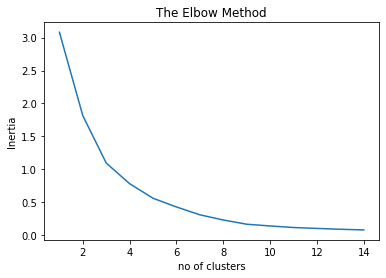

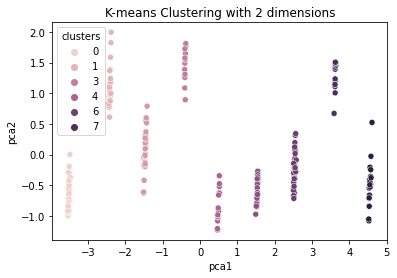

                       country         0         1  ...   56   57  clusters
0                  Afghanistan  0.038183  0.025207  ...  0.0  0.0         1
1                      Albania  0.001681  0.002078  ...  0.0  0.0         4
2                      Algeria  0.139297  0.029313  ...  0.0  0.0         2
3               American Samoa  0.000012  0.000039  ...  0.0  0.0         6
4                      Andorra  0.000027  0.000054  ...  0.0  0.0         4
..                         ...       ...       ...  ...  ...  ...       ...
224  Wallis and Futuna Islands  0.000008  0.000008  ...  0.0  0.0         6
225             Western Sahara  0.015557  0.000392  ...  0.0  0.0         2
226                      Yemen  0.030878  0.020042  ...  0.0  0.0         8
227                     Zambia  0.044017  0.012127  ...  0.0  0.0         7
228                   Zimbabwe  0.022854  0.011727  ...  0.0  0.0         7

[229 rows x 60 columns]


In [66]:
import numpy as np 
import pandas as pd
import io
import csv
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import seaborn as sns
uploaded = files.upload()
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
drive.mount('drive')

# Before_imputation = pd.read_csv(io.StringIO(uploaded['FinalCountryDataset.csv'].decode('utf-8')))
# Before_imputation.isnull().sum

# normalize
data = pd.read_csv('FinalCountryDataset.csv')
col = data['country']
data.drop('country', axis = 1, inplace = True)
# maximum=data.max() 
# minimum=data.min()  
# dataf = (data - minimum)/(maximum - minimum)
x = data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
print(df)
df.isnull().sum
x = df.iloc[:,[3,4]].values

score = []
for cluster in range(1, 15):
  kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
  kmeans.fit(x)
  score.append(kmeans.inertia_)
plt.plot(range(1,15), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('Inertia')
plt.show()

input_data = df
# kmeans
features = list(input_data.columns)
data = input_data[features]
clustering_kmeans = KMeans(n_clusters=9, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)

# plotting
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

# adding country column back into data
data = data.merge(col, left_index = True, right_index = True)
cols = list(data.columns)
cols = [cols[-1]] + cols[:-1]
data = data[cols]
print(data)

# export cluster 0
df = data[data['clusters'] == 0]
df.to_csv('kmeans_0.csv')
!cp kmeans_0.csv "drive/My Drive/"

# export cluster 1
df = data[data['clusters'] == 1]
df.to_csv('kmeans_1.csv')
!cp kmeans_1.csv "drive/My Drive/"

# export cluster 2
df = data[data['clusters'] == 2]
df.to_csv('kmeans_2.csv')
!cp kmeans_2.csv "drive/My Drive/"

# export cluster 3
df = data[data['clusters'] == 3]
df.to_csv('kmeans_3.csv')
!cp kmeans_3.csv "drive/My Drive/"

# export cluster 4
df = data[data['clusters'] == 4]
df.to_csv('kmeans_4.csv')
!cp kmeans_4.csv "drive/My Drive/"

# export cluster 5
df = data[data['clusters'] == 5]
df.to_csv('kmeans_5.csv')
!cp kmeans_5.csv "drive/My Drive/"

# export cluster 6
df = data[data['clusters'] == 6]
df.to_csv('kmeans_6.csv')
!cp kmeans_6.csv "drive/My Drive/"

# export cluster 7
df = data[data['clusters'] == 7]
df.to_csv('kmeans_7.csv')
!cp kmeans_7.csv "drive/My Drive/"

# export cluster 8
df = data[data['clusters'] == 8]
df.to_csv('kmeans_8.csv')
!cp kmeans_8.csv "drive/My Drive/"